In [1]:
# Importing the libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_excel('EVT5_spectra_split.xlsx')
dataset.head(10)


,Sample ID,Set,Protein,Type,Species,1350.1554633964,1351.3973965151,1352.6416148041,1353.8881279906,1355.1369390092,...,2510.7786684154,2515.0769064023,2519.3898919675,2523.717689278,2528.0603866696,2532.4180492784,2536.7907665812,2541.1786047003,2545.5816542731,2549.9999824259
0,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.169254,0.167321,0.165425,0.163565,0.162072,...,0.686664,0.689297,0.691657,0.693550,0.695463,0.697398,0.699150,0.700870,0.702606,0.704471
1,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.169391,0.167380,0.165408,0.163472,0.161911,...,0.684657,0.687524,0.690261,0.692762,0.695290,0.697846,0.699923,0.701897,0.703890,0.705881
2,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.176566,0.174362,0.172200,0.170079,0.168349,...,0.680052,0.682921,0.685514,0.687635,0.689779,0.691946,0.693950,0.695928,0.697926,0.700044
3,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.176837,0.174546,0.172298,0.170093,0.168304,...,0.679376,0.682056,0.684601,0.686902,0.689228,0.691578,0.693681,0.695737,0.697814,0.699912
4,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.166206,0.164299,0.162428,0.160592,0.159083,...,0.674230,0.676829,0.679354,0.681733,0.684138,0.686568,0.689045,0.691552,0.694084,0.696683
5,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.166478,0.164532,0.162624,0.160751,0.159161,...,0.673562,0.675911,0.678199,0.680363,0.682551,0.684763,0.687059,0.689394,0.691752,0.694230
6,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.151319,0.149358,0.147433,0.145543,0.143950,...,0.653663,0.655557,0.657347,0.658953,0.660576,0.662216,0.664217,0.666321,0.668445,0.670738
7,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.172373,0.170388,0.168440,0.166528,0.164949,...,0.659549,0.661743,0.663879,0.665900,0.667942,0.670006,0.672190,0.674417,0.676666,0.678961
8,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.172587,0.170521,0.168493,0.166502,0.164813,...,0.658371,0.660874,0.663224,0.665307,0.667411,0.669539,0.671342,0.673077,0.674827,0.676639
9,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.154262,0.152433,0.150638,0.148877,0.147397,...,0.670284,0.672511,0.674733,0.676927,0.679144,0.681385,0.683750,0.686162,0.688598,0.691106


In [3]:
pwd

'C:\\Users\\Admin\\Python\\Scripts'

In [4]:
x = dataset.drop(['Sample ID','Protein','Set','Type','Species'], axis = 1) # Features
y = dataset['Protein']  # Target

In [5]:
    # Splitting the dataset into training and testing set (80/20)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [6]:
y_train

697     16.25
1430    11.62
375     11.02
1698    12.59
1850    15.04
        ...  
87       8.78
2036    17.78
1302    10.93
1541    13.10
1281    10.53
Name: Protein, Length: 1667, dtype: float64

In [7]:
with open('x_train.pkl', 'wb') as file:
    pickle.dump((x_train), file)

In [8]:
with open('x_test.pkl', 'wb') as file:
    pickle.dump((x_test), file)

In [9]:
with open('y_train.pkl', 'wb') as file:
    pickle.dump((y_train), file)

In [10]:
with open('y_test.pkl', 'wb') as file:
    pickle.dump((y_test), file)

In [11]:
with open('x_train.pkl', 'rb') as file:
    x_train = pickle.load(file)

In [12]:
with open('x_test.pkl', 'rb') as file:
    x_test = pickle.load(file)

In [13]:
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

In [14]:
y_train

697     16.25
1430    11.62
375     11.02
1698    12.59
1850    15.04
        ...  
87       8.78
2036    17.78
1302    10.93
1541    13.10
1281    10.53
Name: Protein, Length: 1667, dtype: float64

In [15]:
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [16]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
with open('x_train_scaled.pkl', 'wb') as file:
    pickle.dump((x_train_scaled), file)

In [18]:
with open('x_test_scaled.pkl', 'wb') as file:
    pickle.dump((x_test_scaled), file)

In [19]:
params = {
    'n_estimators': 10,      # Number of trees in the forest
    'max_depth': None,        # Maximum depth of the tree, None means unlimited depth
    'min_samples_split': 2,   # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,    # Minimum number of samples required to be at a leaf node
    'max_features': 1,   # Number of features to consider when looking for the best split
    'random_state': 42        # Seed for random number generation
}


In [20]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(**params)

# Fitting the Random Forest Regression model to the data
model.fit(x_train_scaled, y_train)


RandomForestRegressor(max_features=1, n_estimators=10, random_state=42)

In [21]:
# Predicting the target values of the test set
y_pred_train = model.predict(x_train_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_train, y_pred_train)
print(f'R² Score: {r2}')


RMSE:  0.859
R² Score: 0.9298604218533946


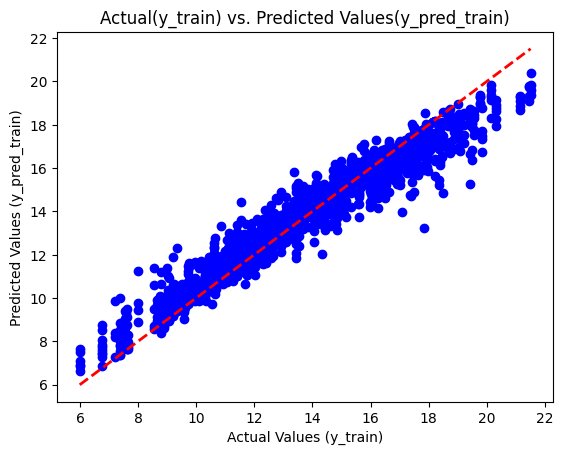

In [22]:
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual(y_train) vs. Predicted Values(y_pred_train)')
plt.show()

In [23]:
# Predicting the target values of the test set
y_pred = model.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


RMSE:  2.07
R² Score: 0.5877512946665986


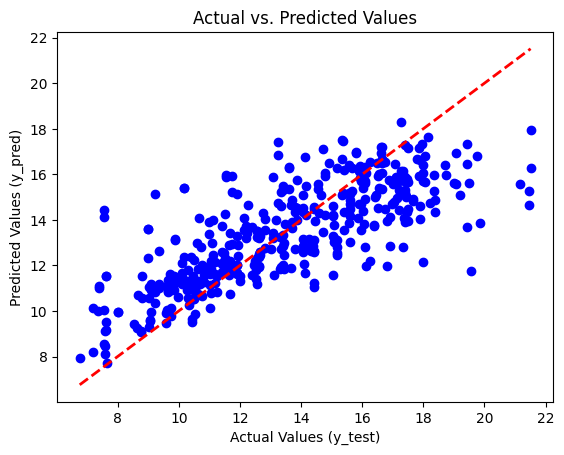

In [24]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [25]:
params = {
    'n_estimators': 100,      # Number of trees in the forest
    'max_depth': None,        # Maximum depth of the tree, None means unlimited depth
    'min_samples_split': 2,   # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,    # Minimum number of samples required to be at a leaf node
    'max_features': 1,   # Number of features to consider when looking for the best split
    'random_state': 42        # Seed for random number generation
}


In [26]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(**params)

# Fitting the Random Forest Regression model to the data
model.fit(x_train_scaled, y_train)


RandomForestRegressor(max_features=1, random_state=42)

In [27]:
# Predicting the target values of the test set
y_pred_train = model.predict(x_train_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_train, y_pred_train)
print(f'R² Score: {r2}')


RMSE:  0.69
R² Score: 0.9547937538997953


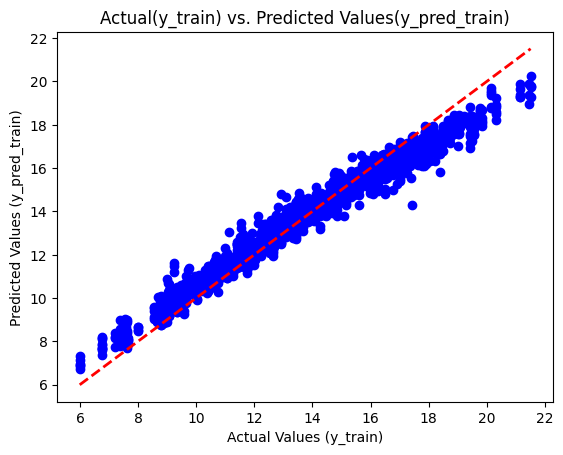

In [28]:
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual(y_train) vs. Predicted Values(y_pred_train)')
plt.show()

In [29]:
# Predicting the target values of the test set
y_pred = model.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


RMSE:  1.902
R² Score: 0.6520907635247084


In [31]:
params = {
    'n_estimators': 500,      # Number of trees in the forest
    'max_depth': None,        # Maximum depth of the tree, None means unlimited depth
    'min_samples_split': 2,   # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,    # Minimum number of samples required to be at a leaf node
    'max_features': 1,   # Number of features to consider when looking for the best split
    'random_state': 42        # Seed for random number generation
}


In [32]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(**params)

# Fitting the Random Forest Regression model to the data
model.fit(x_train_scaled, y_train)


RandomForestRegressor(max_features=1, n_estimators=500, random_state=42)

In [33]:
# Predicting the target values of the test set
y_pred_train = model.predict(x_train_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_train, y_pred_train)
print(f'R² Score: {r2}')


RMSE:  0.67
R² Score: 0.957366503639235


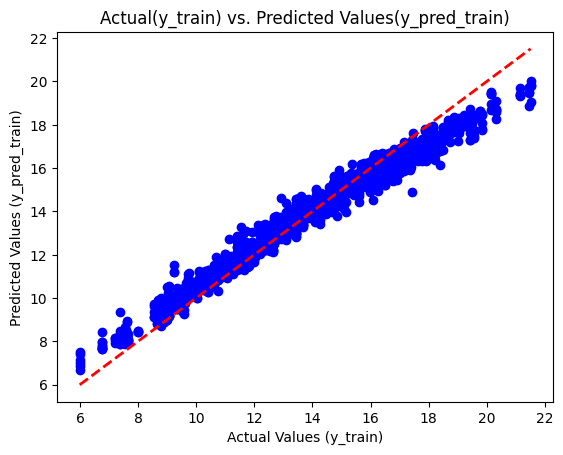

In [34]:
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual(y_train) vs. Predicted Values(y_pred_train)')
plt.show()

In [35]:
# Predicting the target values of the test set
y_pred = model.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


RMSE:  1.877
R² Score: 0.6611452622829417


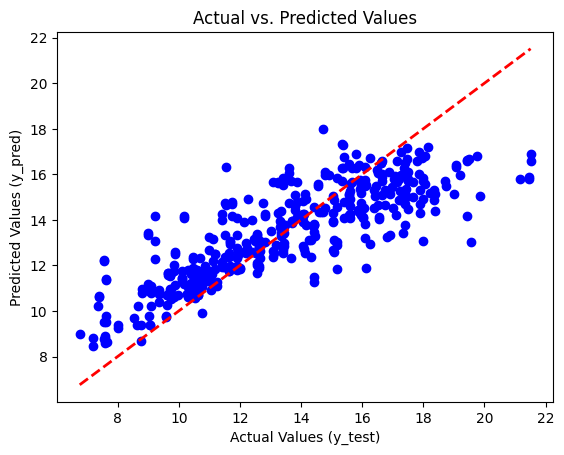

In [36]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()